참고 소스 : https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb

데이터 : https://github.com/CSSEGISandData/COVID-19


In [0]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline


In [12]:
# 존스 홉킨스 데이터 다운로드
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60


In [13]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20',
       '5/19/20', '5/20/20', '5/21/20', '5/22/20'],
      dtype='object', length=126)

In [0]:
# 일일 데이터만 추출('Province/State', 'Country/Region', 'Lat', 'Long' 컬럼 제외)
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


In [0]:
dates = confirmed.keys()
adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)


In [0]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]


In [17]:
# 국가 리스트 및 국가별 인구 수
TOP_N = 47  # 확진자 상위 국가 N
unique_countries = list(confirmed_df['Country/Region'].unique())
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in
                    sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
top_countries = unique_countries[:TOP_N]

print(top_countries)

population = {'China':1399620000,
 'Italy':60278616,
 'US':330093000,
 'Spain':46934632,
 'Germany':83073100,
 'Iran':82878200,
 'France':67055000,
 'Korea, South':51851427,
 'Switzerland':8544034,
 'United Kingdom':66435600,
 'Netherlands':17084459,
 'Japan':126150000,
 'Netherlands':17084459,
 'Austria':8751820,
 'Belgium':11498519,
 'Canada':36954000,
 'Turkey':82600000,
 'Portugal':10291027,
 'Brazil':374563873,
 'Israel':9033730,
 'Sweden':10255102,
 'Norway':5334762,
 'Australia':25371700,
 'Russia':146748600,
 'Ireland':4921500,
 'India':1360979857,
 'Peru':32131400,
 'Chile':19107216,
 'Ecuador':17245100,
 'Saudi Arabia':33413660,
 'Poland':38413000,
 'Singapore':5638700,
 'Mexico':126577691,
 'Pakistan':219181520,
 'Romania':19523621,
 'Belarus':9465300,
 'Qatar':2772294,
 'United Arab Emirates':9682088,
 'Ukraine':43609194,
 'Indonesia':266911900,
 'Denmark':5811413,
 'Bangladesh':169220871,
 'Colombia':49841562,
 'Philippines':107687078,
 'South Africa':58125658,
 'Dominican Republic':10358320,
 'Kuwait':4420110,
 'Egypt':101712297,
 'Serbia':7001444,
 'Panama':4218808,
 'Argentina':45150850
}


['US', 'Brazil', 'Russia', 'United Kingdom', 'Spain', 'Italy', 'France', 'Germany', 'Turkey', 'Iran', 'India', 'Peru', 'China', 'Canada', 'Saudi Arabia', 'Mexico', 'Chile', 'Belgium', 'Pakistan', 'Netherlands', 'Qatar', 'Ecuador', 'Belarus', 'Sweden', 'Switzerland', 'Singapore', 'Bangladesh', 'Portugal', 'United Arab Emirates', 'Ireland', 'Indonesia', 'Poland', 'Ukraine', 'South Africa', 'Kuwait', 'Colombia', 'Romania', 'Israel', 'Japan', 'Austria', 'Egypt', 'Dominican Republic', 'Philippines', 'Denmark', 'Korea, South', 'Serbia', 'Argentina']


In [18]:
for i in range(len(top_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region'] == top_countries[i]].sum()
visual_unique_countries = []
visual_confirmed_cases = []
for i in range(len(country_confirmed_cases[:TOP_N])):
    visual_unique_countries.append(top_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

list(zip(visual_unique_countries, visual_confirmed_cases))

[('US', 1600937),
 ('Brazil', 330890),
 ('Russia', 326448),
 ('United Kingdom', 255544),
 ('Spain', 234824),
 ('Italy', 228658),
 ('France', 182015),
 ('Germany', 179710),
 ('Turkey', 154500),
 ('Iran', 131652),
 ('India', 124794),
 ('Peru', 111698),
 ('China', 84081),
 ('Canada', 83947),
 ('Saudi Arabia', 67719),
 ('Mexico', 62527),
 ('Chile', 61857),
 ('Belgium', 56511),
 ('Pakistan', 50694),
 ('Netherlands', 45088),
 ('Qatar', 40481),
 ('Ecuador', 35828),
 ('Belarus', 34303),
 ('Sweden', 32809),
 ('Switzerland', 30707),
 ('Singapore', 30426),
 ('Bangladesh', 30205),
 ('Portugal', 30200),
 ('United Arab Emirates', 27892),
 ('Ireland', 24506),
 ('Indonesia', 20796),
 ('Poland', 20619),
 ('Ukraine', 20148),
 ('South Africa', 20125),
 ('Kuwait', 19564),
 ('Colombia', 19131),
 ('Romania', 17712),
 ('Israel', 16690),
 ('Japan', 16513),
 ('Austria', 16436),
 ('Egypt', 15786),
 ('Dominican Republic', 13989),
 ('Philippines', 13597),
 ('Denmark', 11428),
 ('Korea, South', 11165),
 ('Serbia',

국가별 누적 확진자 수평 막대 그래프

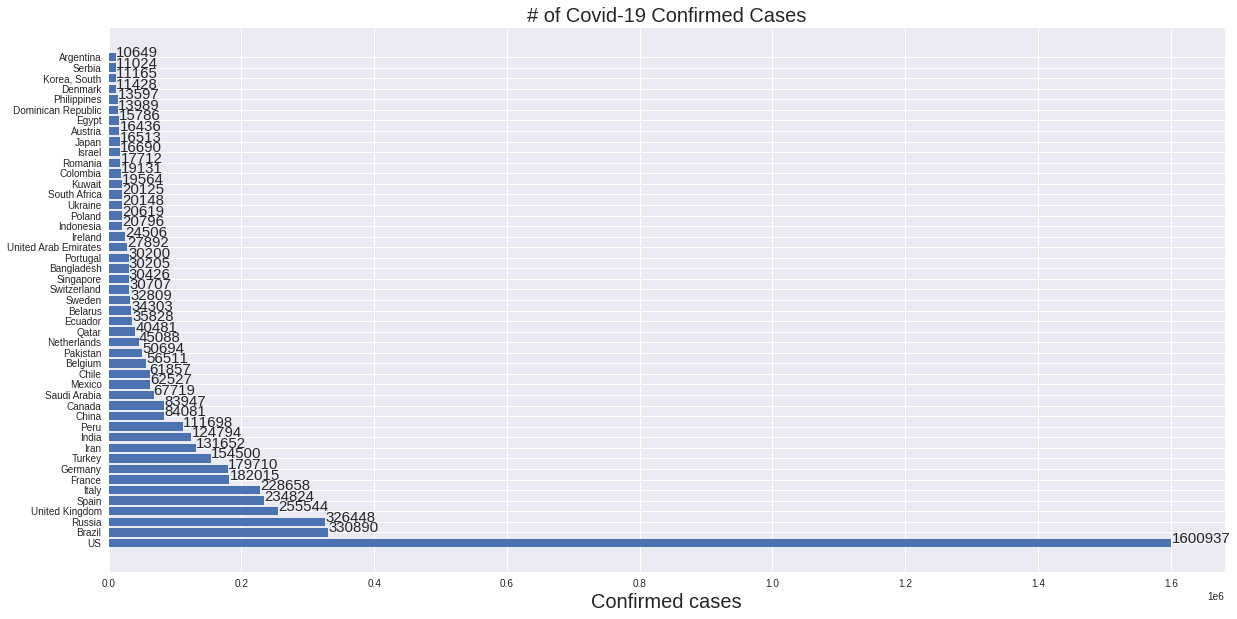

In [19]:
plt.figure(figsize=(20, 10))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.xlabel('Confirmed cases', size=20)
plt.title('# of Covid-19 Confirmed Cases', size=20)
for i, case in enumerate(visual_confirmed_cases):
  plt.annotate(xy=[case + 100,i], s=case, size=15)


인구 수 10만명 당 확진자 수

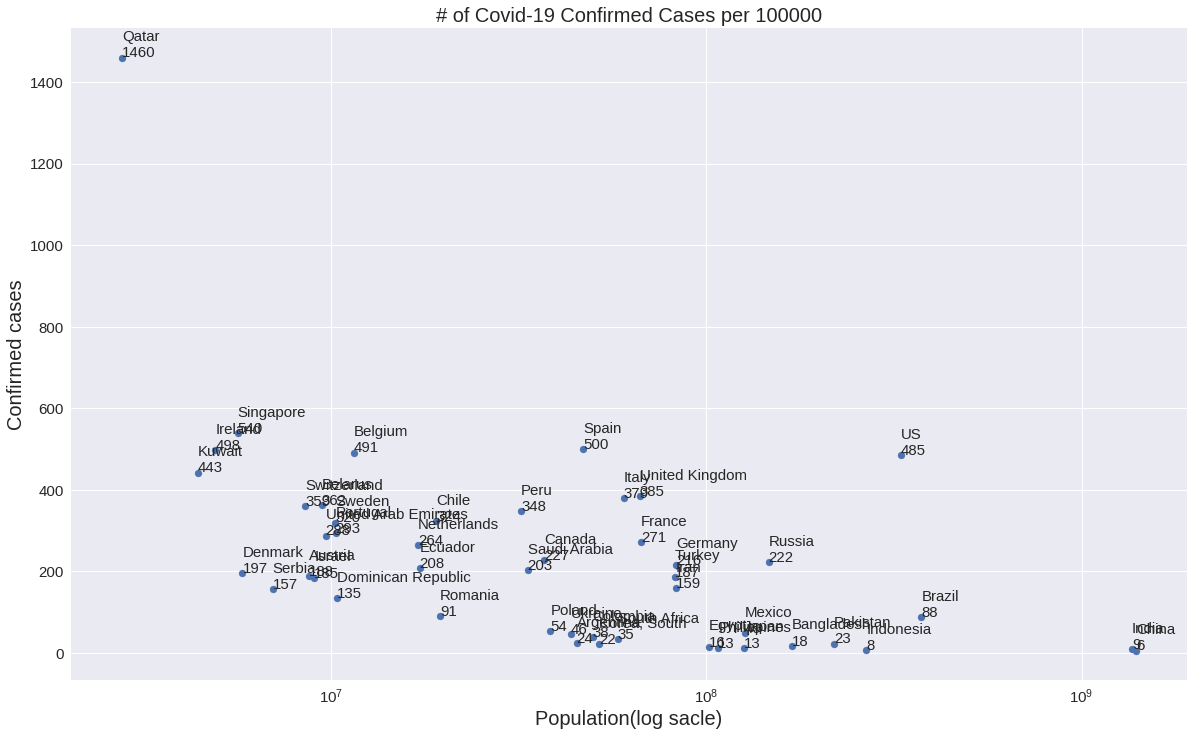

In [20]:
plt.figure(figsize=(20, 12))
v_unique_countries = unique_countries[:TOP_N]
visual_confirmed_cases = []
for i in range(len(v_unique_countries)):
    visual_confirmed_cases.append(latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum())
population_confirmed_cases = []
populations = []
for country, case in zip(v_unique_countries, visual_confirmed_cases):
  population_confirmed_cases.append(case * 100000 / population[country])
  populations.append(population[country])
plt.xlabel('Population(log sacle)', size=20)
plt.ylabel('Confirmed cases', size=20)
plt.xscale('log')
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(populations, population_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases per 100000', size=20)
for c, p, case in zip(v_unique_countries, populations, population_confirmed_cases):
  plt.annotate(xy=[p, case + 1], s='{}\n{:.0f}'.format(c, case), size=15)

인구 수 100만 당 사망자 수

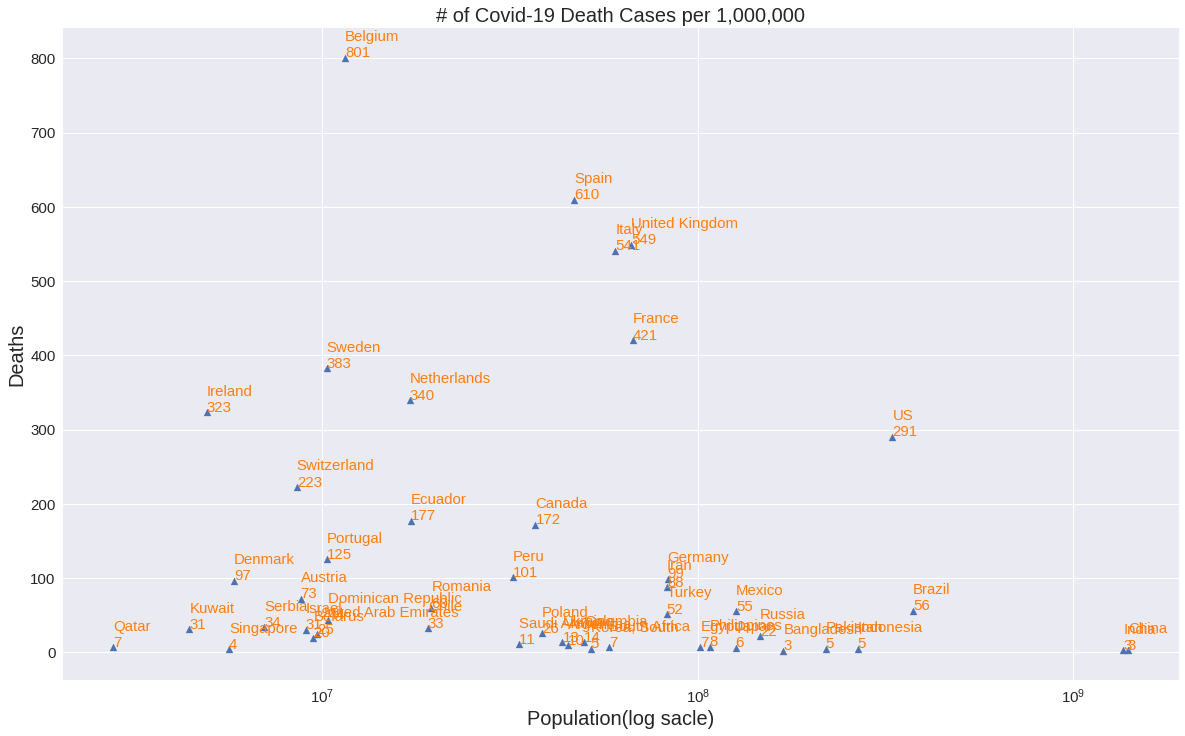

In [21]:
# plt.figure(figsize=(20, 12))
# v_unique_countries = visual_unique_countries
# visual_confirmed_cases = []
# for i in range(len(v_unique_countries)):
#     visual_confirmed_cases.append(latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum())
# death_ratios = []
# for i in range(len(v_unique_countries)):
#   ratio = (latest_deaths[deaths_df['Country/Region'] == v_unique_countries[i]].sum() * 100)  / latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum()
#   death_ratios.append(ratio)

# plt.bar(v_unique_countries, death_ratios)
# plt.xlabel('Country', size=20)
# plt.ylabel('Death rate(%)', size=20)
# plt.title('Death rate of Covid-19', size=20)
# for i, ratio in enumerate(death_ratios):
#   plt.annotate(xy=[i, ratio + 0.1], s='{:.1f}%'.format(ratio), size=20)


plt.figure(figsize=(20, 12))
v_unique_countries = unique_countries[:TOP_N]
visual_death_cases = []
for i in range(len(v_unique_countries)):
    visual_death_cases.append(latest_deaths[deaths_df['Country/Region'] == v_unique_countries[i]].sum())
population_cases = []
populations = []
for country, case in zip(v_unique_countries, visual_death_cases):
  population_cases.append(case * 1000000 / population[country])
  populations.append(population[country])
plt.xlabel('Population(log sacle)', size=20)
plt.ylabel('Deaths', size=20)
plt.xscale('log')
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(populations, population_cases, marker='^')
plt.title('# of Covid-19 Death Cases per 1,000,000', size=20)
for c, p, case in zip(v_unique_countries, populations, population_cases):
  plt.annotate(xy=[p, case + 1], s='{}\n{:.0f}'.format(c, case), size=15, color='tab:orange')

국가별 확진자 상대 비율(파이 챠트)

Text(0.5, 1.0, 'Ratio of Covid-19 Confirmed Cases')

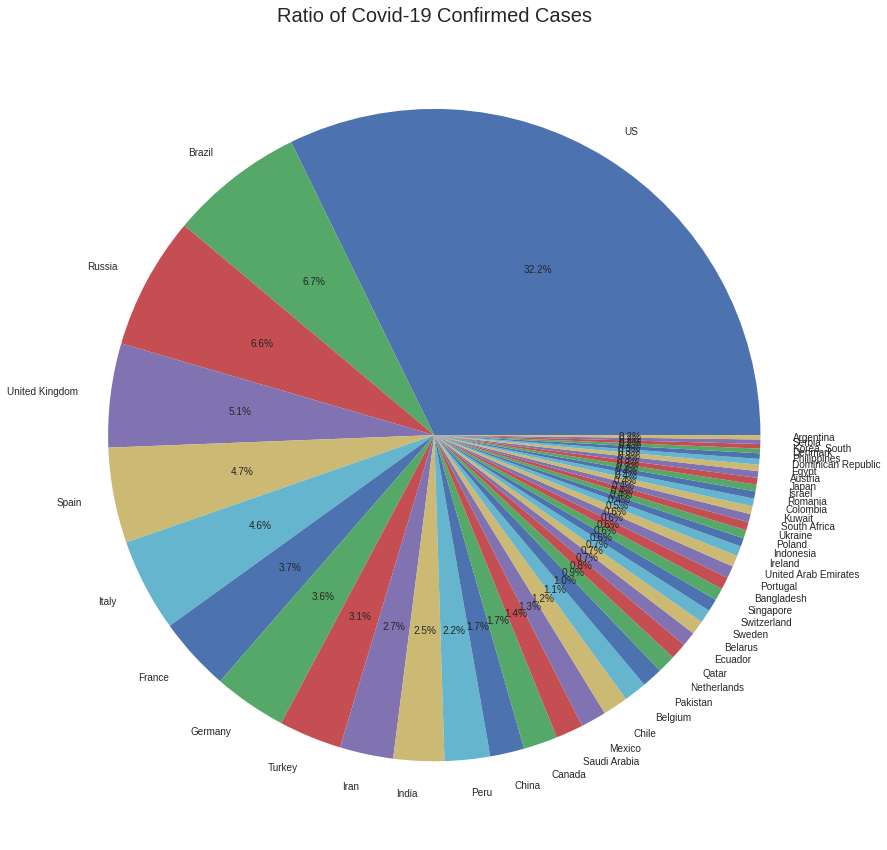

In [22]:
plt.figure(figsize=(20, 15))
plt.pie(visual_confirmed_cases, labels=visual_unique_countries,autopct='%1.1f%%')
plt.title('Ratio of Covid-19 Confirmed Cases', size=20)

전체 누적 확진자 및 신규 확진자

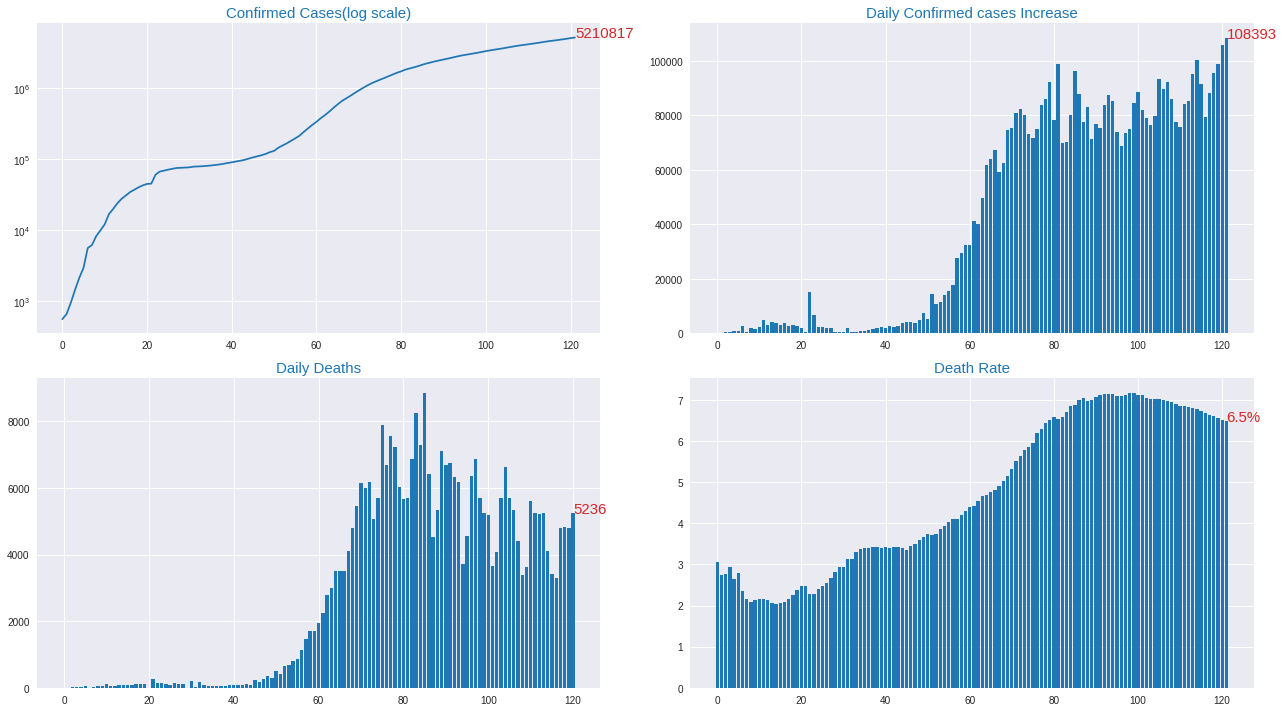

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:blue'
adjusted_dates = [i for i in range(len(dates))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:red')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:red')

total_deaths = deaths.sum()
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:red')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:red')

fig.tight_layout()


국가별 신규 확진자 추이

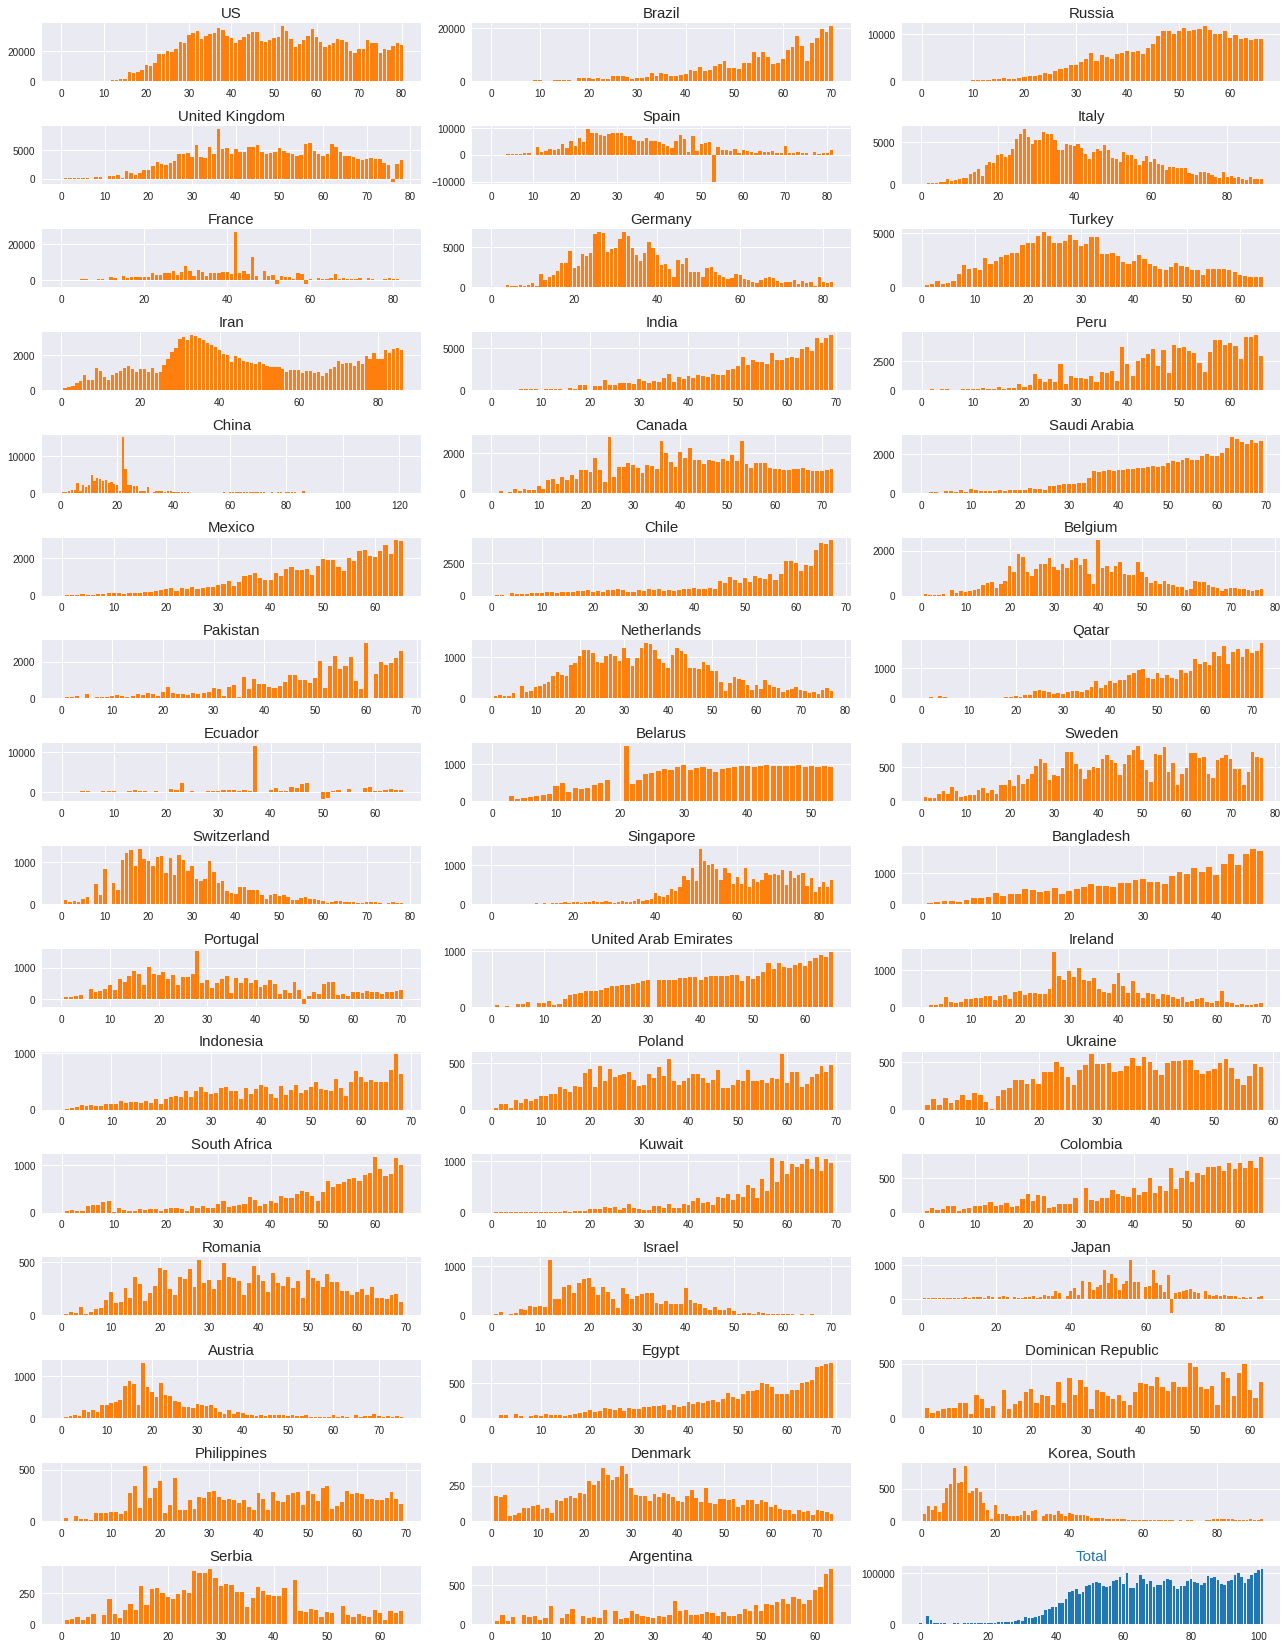

In [24]:
color = 'tab:orange'
ROWS = 16
fig, axs = plt.subplots(ROWS, 3, figsize=(18, 23))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
  cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  cases = [c for c in cases if c > 100]
  adjusted_dates = [i for i in range(len(cases))]
  new_cases =[0]
  for i, case in enumerate(cases[:-1]):
    new_cases.append(cases[i + 1] - cases[i])
  row, col = divmod(index, 3)
  axs[row, col].bar(adjusted_dates, new_cases, color=color)
  axs[row, col].set_title(country, size=15)

total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
color = 'tab:blue'
axs[ROWS - 1, 2].bar(adjusted_dates, new_cases, color=color)
axs[ROWS - 1, 2].set_title('Total', size=15, color=color)

fig.tight_layout()

국가별 일일 사망률 추이

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text major ticklabel objects>)

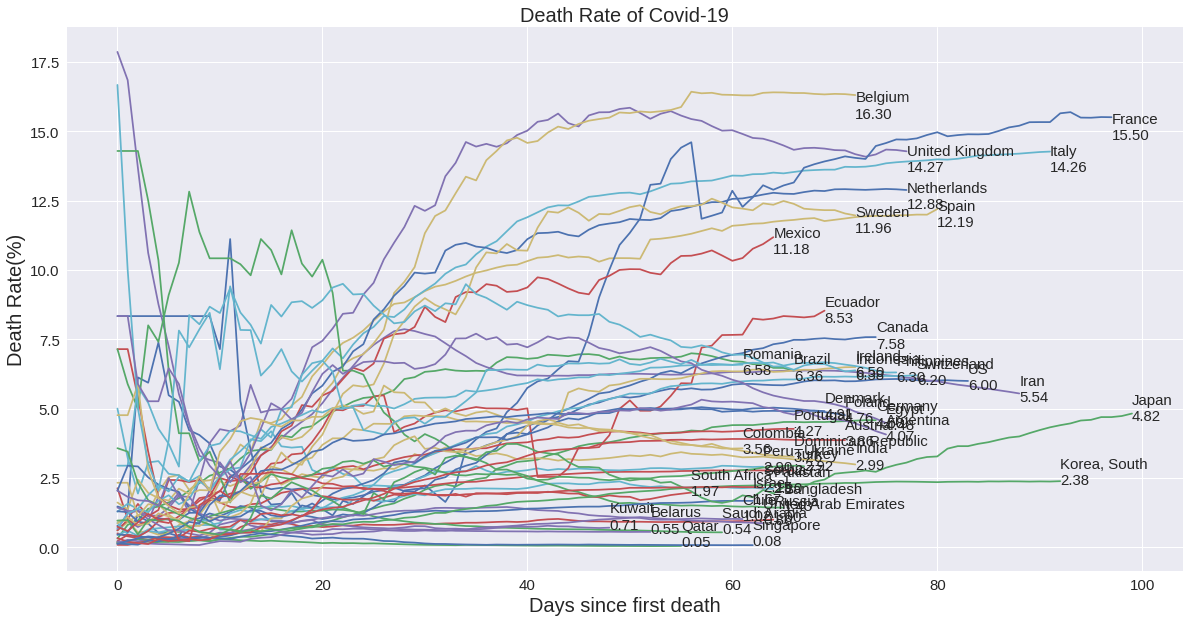

In [25]:
plt.figure(figsize=(20, 10))
for country in v_unique_countries:
  if country == 'China':
    continue
  cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  death_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  deaths_ratio =[]
  for i, case in enumerate(cases):
    deaths_ratio.append(death_cases[i] * 100 / cases[i])
  deaths_ratio = [d for d in deaths_ratio if 0 < d < 18]
  adjusted_dates = [i for i in range(len(deaths_ratio))]
  plt.plot(deaths_ratio)
  plt.annotate(xy=[len(deaths_ratio)-1,deaths_ratio[-1] * 0.95], s=country + '\n' + '{:.2f}'.format(deaths_ratio[-1]), size=15)
plt.title('Death Rate of Covid-19', size=20)
plt.xlabel('Days since first death', size=20)
plt.ylabel('Death Rate(%)', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

국가별 사망자 수 추이

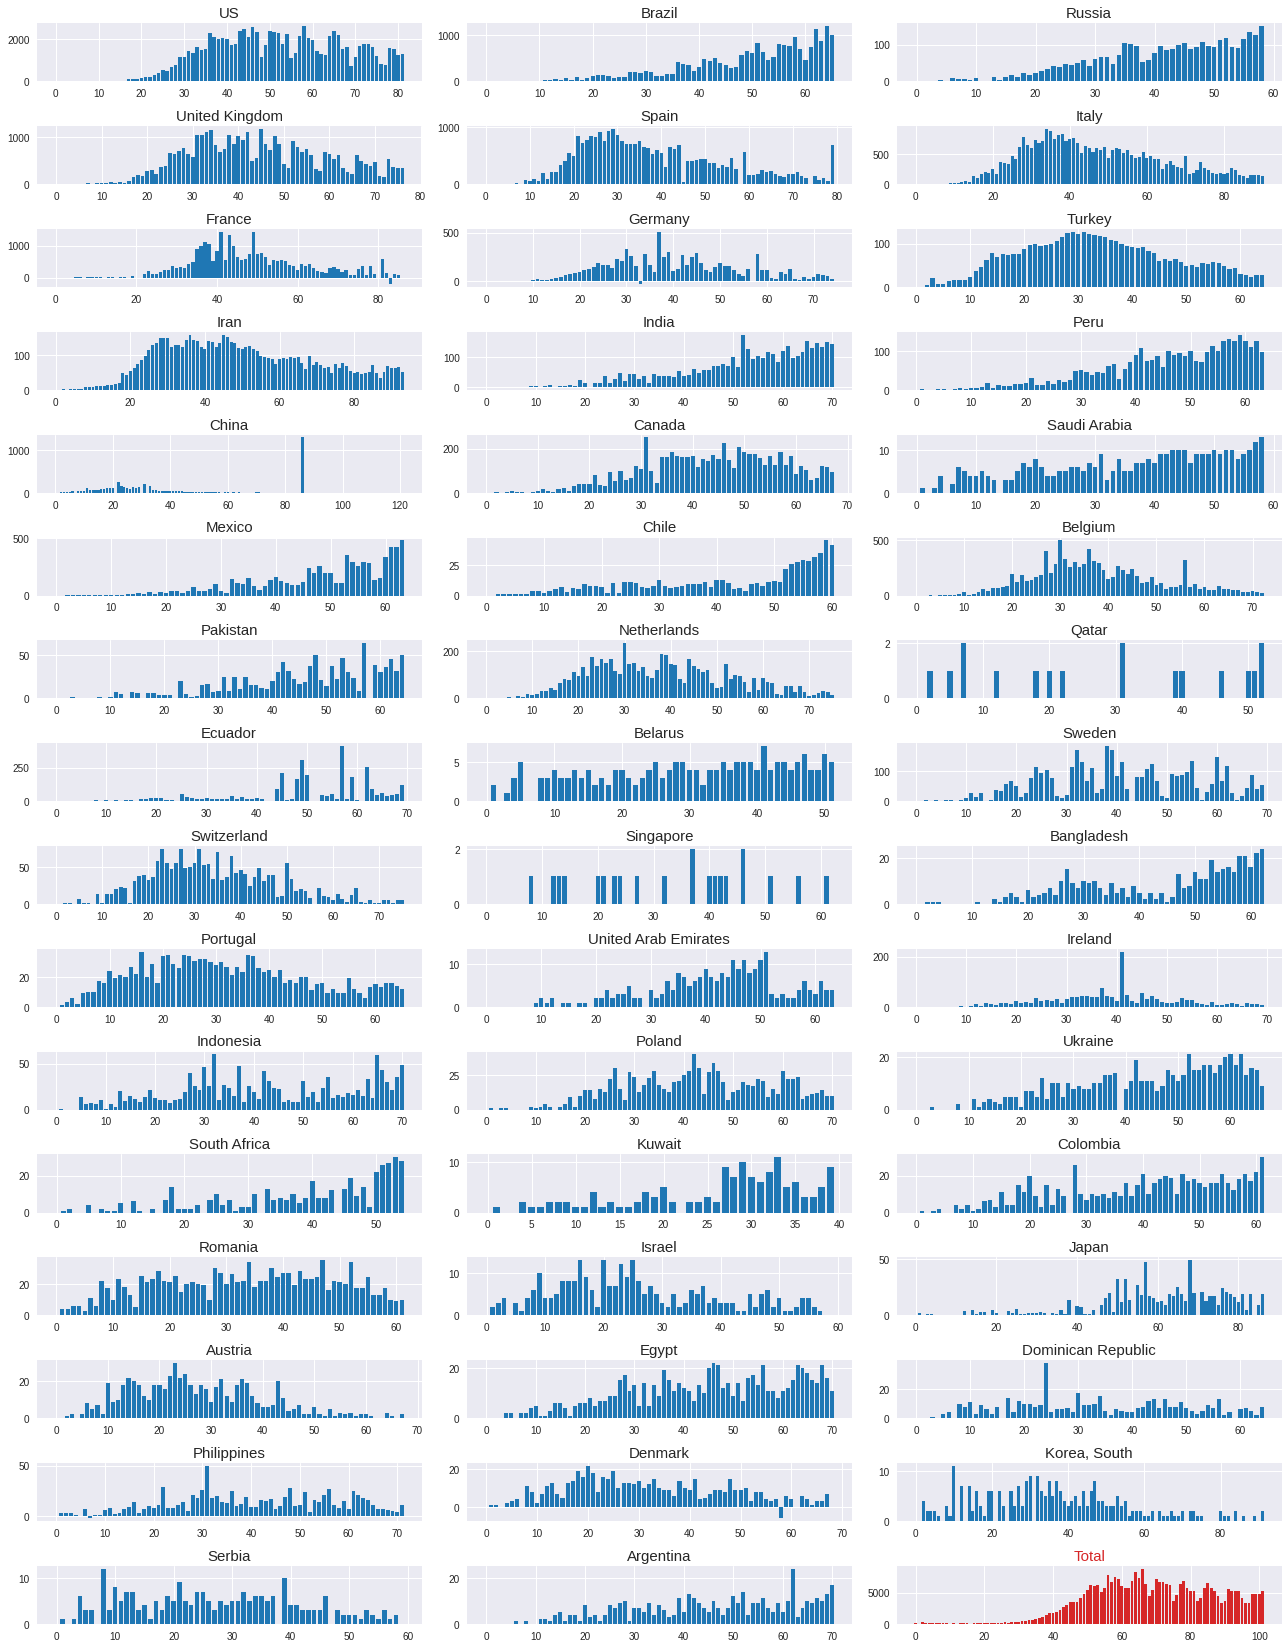

In [26]:
color = 'tab:blue'
fig, axs = plt.subplots(ROWS, 3, figsize=(18, 23))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
  cases = deaths_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  cases = [c for c in cases if c > 1]
  adjusted_dates = [i for i in range(len(cases))]
  new_cases =[0]
  for i, case in enumerate(cases[:-1]):
    new_cases.append(cases[i + 1] - cases[i])
  row, col = divmod(index, 3)
  axs[row, col].bar(adjusted_dates, new_cases, color=color)
  axs[row, col].set_title(country, size=15)

total_cases = deaths.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
color = 'tab:red'
axs[ROWS - 1, 2].bar(adjusted_dates, new_cases, color=color)
axs[ROWS - 1, 2].set_title('Total', size=15, color=color)

fig.tight_layout()

이탈리아 현황

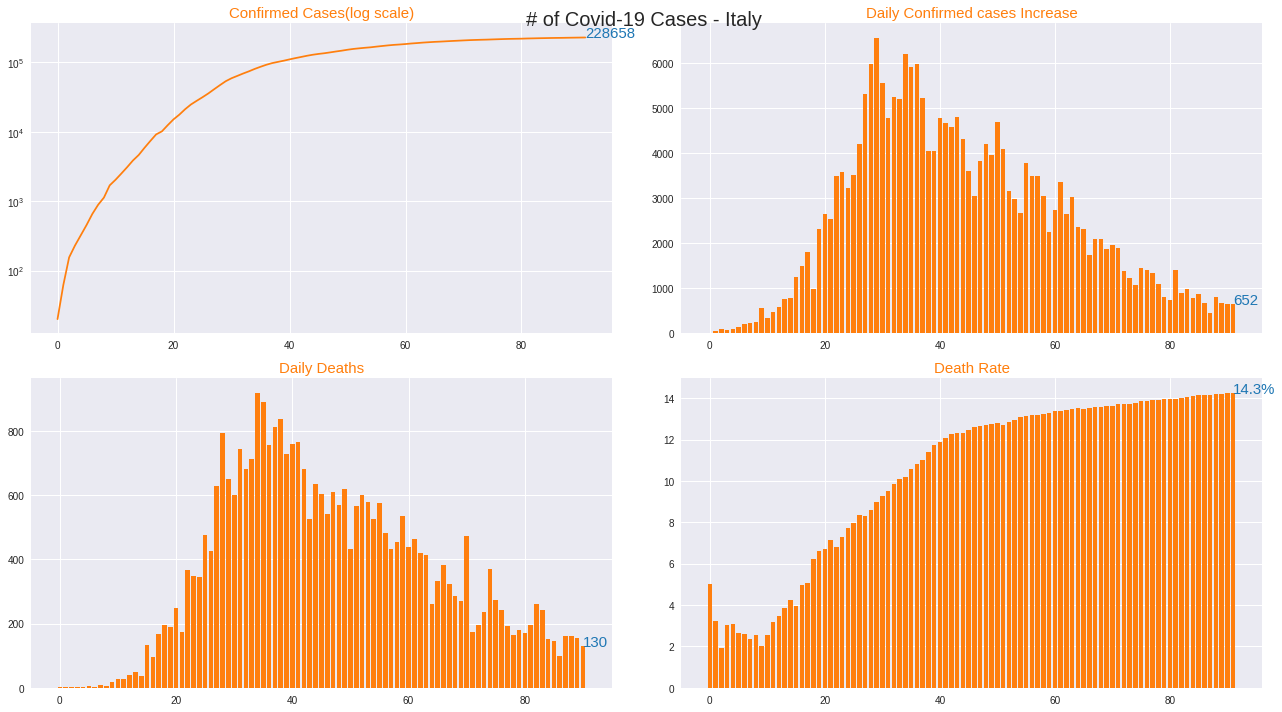

In [27]:
country = 'Italy'
start = 30
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - Italy', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


미국 추이

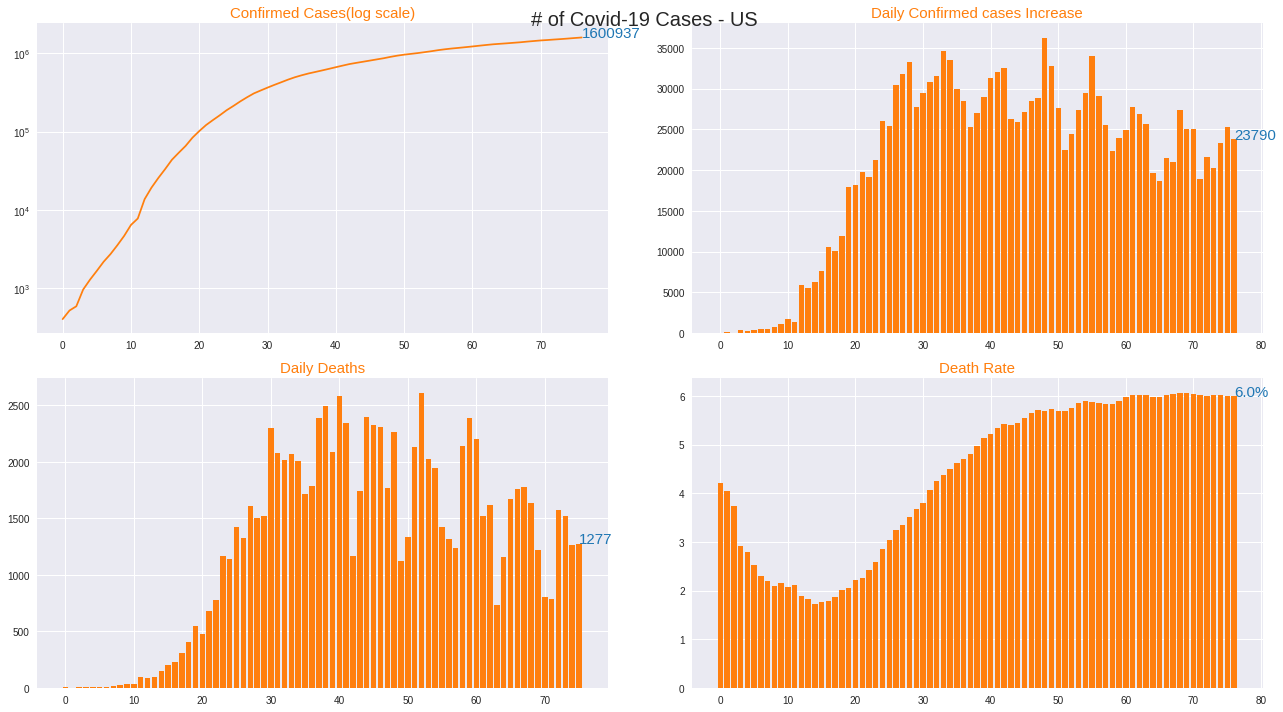

In [28]:
country = 'US'
start = 45
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - US', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


국가별,일별 누적 확진자 그래프(중국 제외)


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000., 1800000.]),
 <a list of 11 Text major ticklabel objects>)

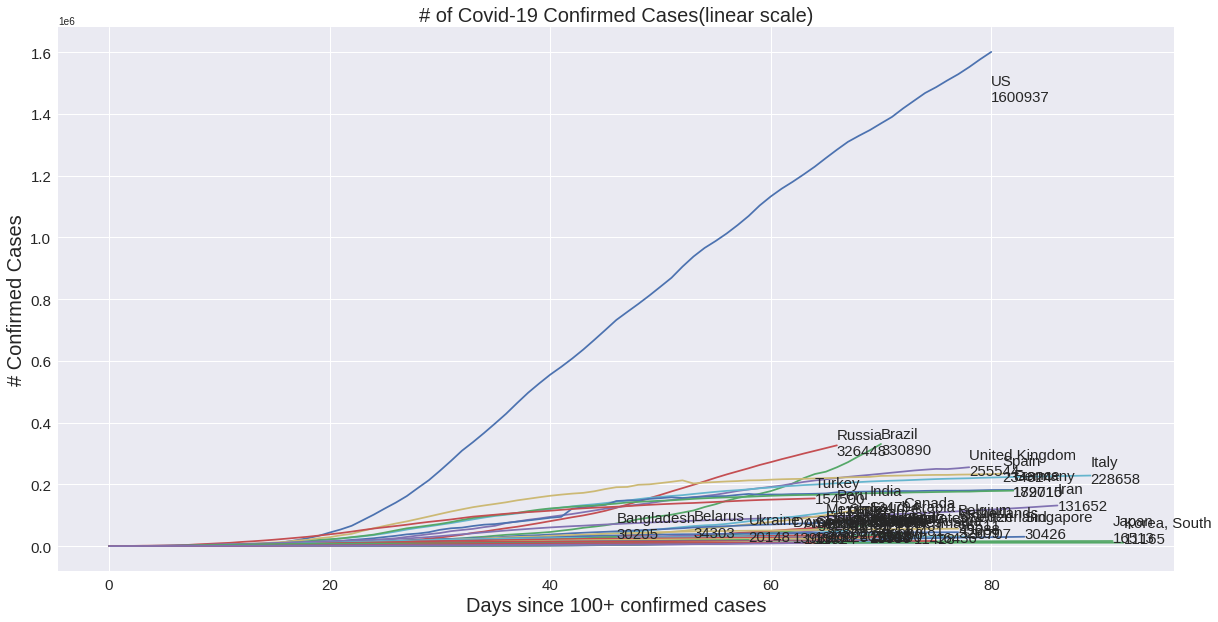

In [29]:
plt.figure(figsize=(20, 10))
for country in v_unique_countries:
  if country == 'China':
    continue
  country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
  country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
  plt.plot(country_confirmed_cases)
  plt.annotate(xy=[len(country_confirmed_cases)-1,country_confirmed_cases[-1] * 0.9], s=country + '\n' + str(country_confirmed_cases[-1]), size=15)
plt.title('# of Covid-19 Confirmed Cases(linear scale)', size=20)
plt.xlabel('Days since 100+ confirmed cases', size=20)
plt.ylabel('# Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)


확진자 100명 이후 경과일수에 따른 확진자 추이(중국 제외)

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
        1.e+08]), <a list of 9 Text major ticklabel objects>)

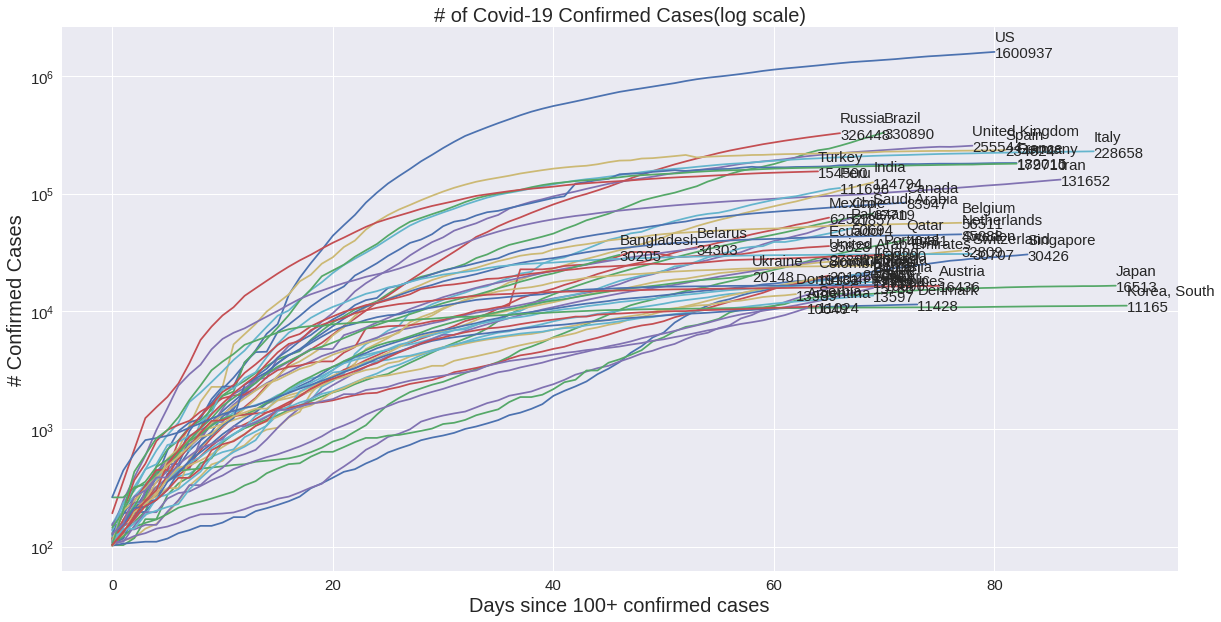

In [30]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
for country in v_unique_countries:
  if country == 'China':
    continue
  country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
  country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
  country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
  plt.plot(country_confirmed_cases)
  plt.annotate(xy=[len(country_confirmed_cases)-1,country_confirmed_cases[-1] * 0.9], s=country + '\n' + str(country_confirmed_cases[-1]), size=15)
plt.title('# of Covid-19 Confirmed Cases(log scale)', size=20)
plt.xlabel('Days since 100+ confirmed cases', size=20)
plt.ylabel('# Confirmed Cases', size=20)
# plt.legend(v_unique_countries, loc='upper left')
plt.xticks(size=15)
plt.yticks(size=15)

국내 확진자/격리중/완치자/사망자

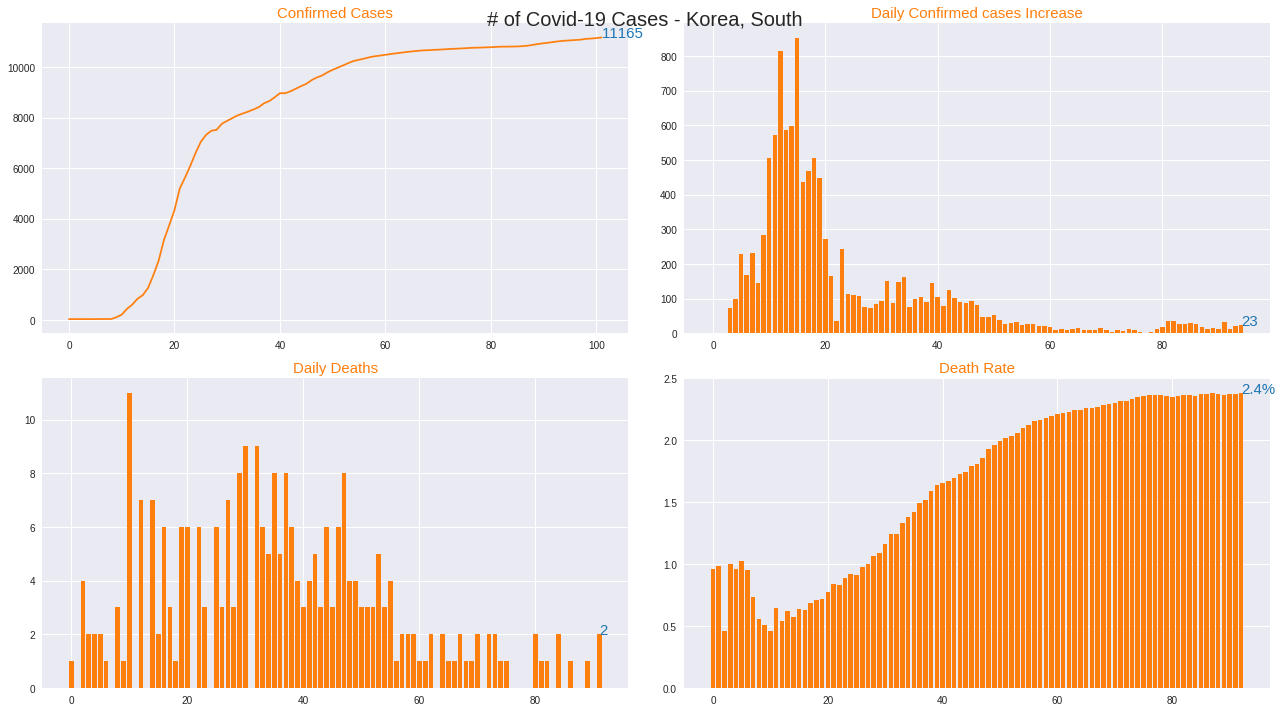

In [31]:
# country = 'Korea, South'
# adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
# adjusted_dates = adjusted_dates[20:]
# plt.figure(figsize=(20, 7))
# country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_confirmed_cases[20:])

# country_recovered_cases = recoveries_df.loc[recoveries_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_recovered_cases = country_recovered_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_recovered_cases[20:])

# country_deaths_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_deaths_cases = country_deaths_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_deaths_cases[20:])

# infected = [(confirmed - recovered - death) for confirmed, recovered, death in zip(country_confirmed_cases, country_recovered_cases, country_deaths_cases)]
# plt.plot(adjusted_dates, infected[20:])

# plt.title('# of Covid-19 Cases - Korea, South', size=20)
# plt.xlabel('Days since 1/22/2020', size=20)
# plt.ylabel('# Cases', size=20)
# plt.annotate(xy=(len(dates)-1, country_confirmed_cases[-1]*0.95), s='Confirmed\n{}'.format(country_confirmed_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, country_recovered_cases[-1]*0.95), s='Recovered\n{}'.format(country_recovered_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, country_deaths_cases[-1]*0.95), s='Deaths\n{}'.format(country_deaths_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, infected[-1]*0.95), s='Not recovered\n{}'.format(infected[-1]), size=15)
# plt.xticks(size=15)


country = 'Korea, South'
start = 20
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - Korea, South', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
#axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

new_cases = [c for c in new_cases if c > 0]
adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

death_ratios = [r for r in death_ratios if r > 0]
adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


EU 국가 현황

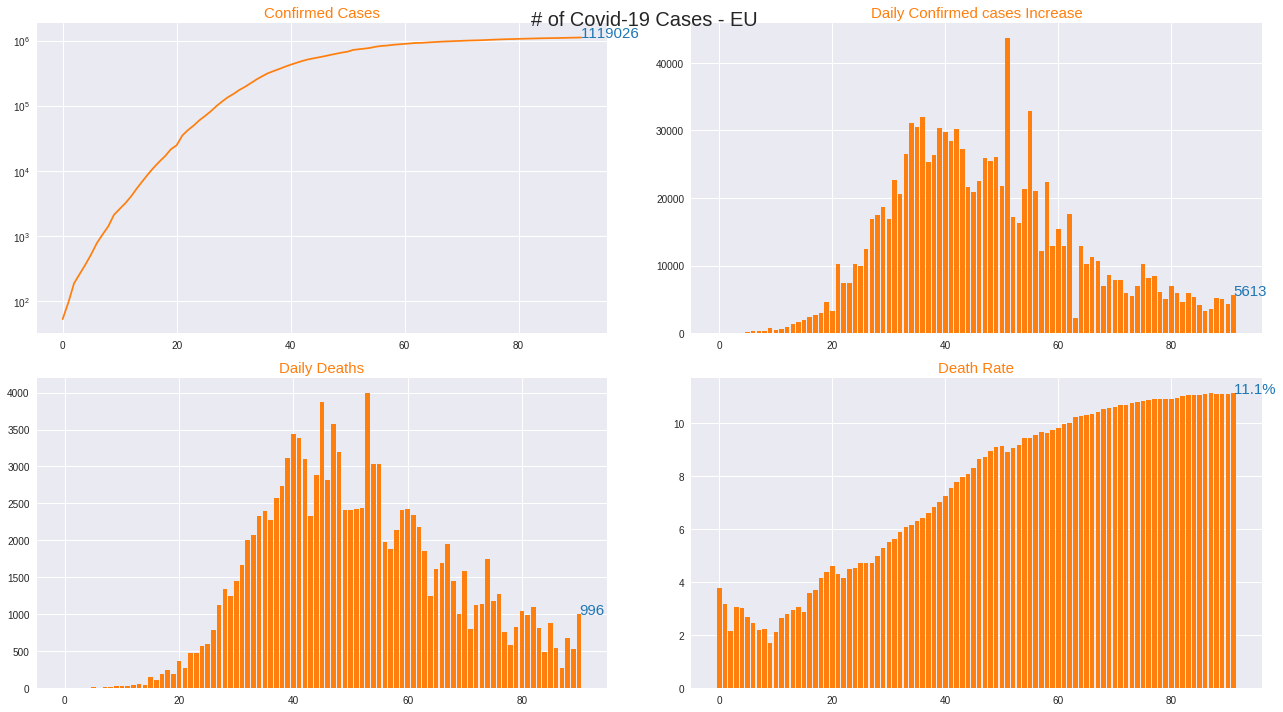

In [32]:
country = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Greece', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
           'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Sweden', 'Spain', 'Italy', 'Germany', 'France']
start = 30
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - EU', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'].isin(country), cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'].isin(country), cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


남미 국가 현황


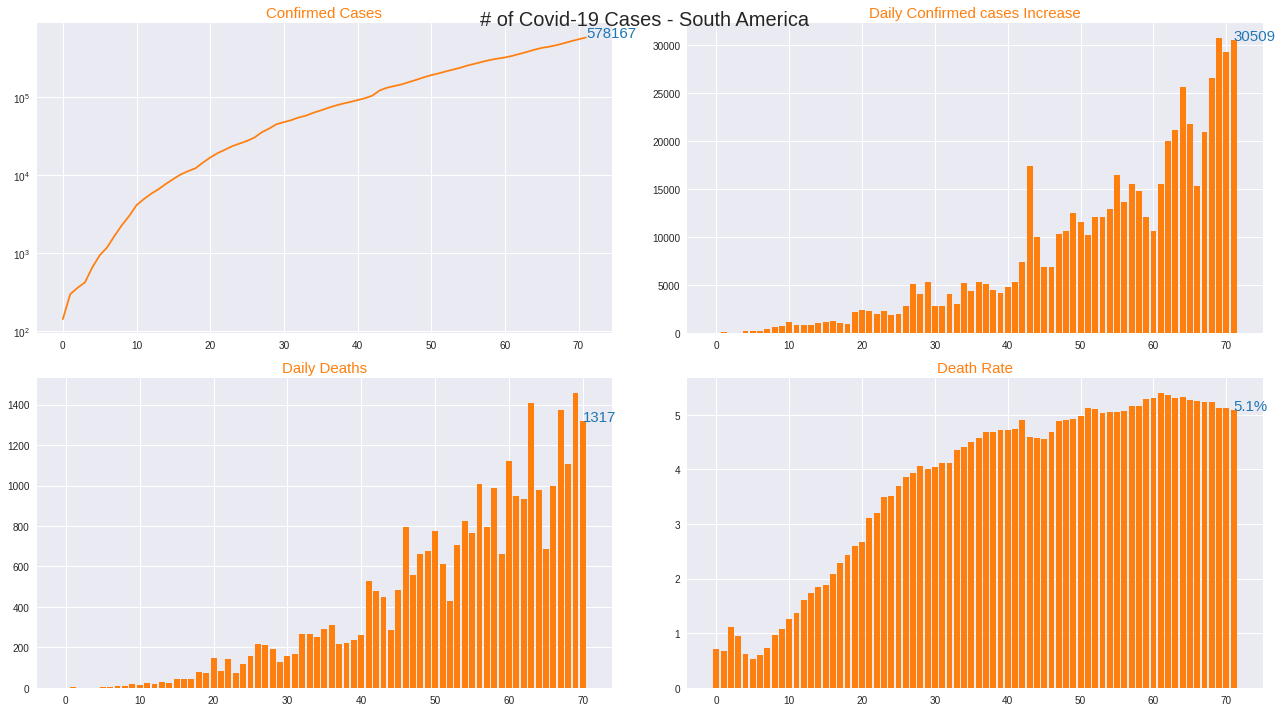

In [33]:
country = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
start = 50
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - South America', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'].isin(country), cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
  new_cases.append(total_cases[i + 1] - total_cases[i])
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'].isin(country), cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
  new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()
